IMPORT DATA

In [1]:
import pandas as pd
import numpy as np

In [2]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


ANALYZING INDIVIDUAL FEATURES

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


## 1. Find the correlation between the following columns: bore, stroke, compression-ratio, and horsepower.

In [6]:
df_corr=df[['bore','stroke','compression-ratio','horsepower']]
df_corr

,bore,stroke,compression-ratio,horsepower
0,3.47,2.68,9.0,111.0
1,3.47,2.68,9.0,111.0
2,2.68,3.47,9.0,154.0
3,3.19,3.40,10.0,102.0
4,3.19,3.40,8.0,115.0
...,...,...,...,...
196,3.78,3.15,9.5,114.0
197,3.78,3.15,8.7,160.0
198,3.58,2.87,8.8,134.0
199,3.01,3.40,23.0,106.0


In [7]:
df_corr.corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


## 2. Find the scatterplot of "engine-size" and "price".
Positive Linear Relationship

(0.0, 53130.380816396435)

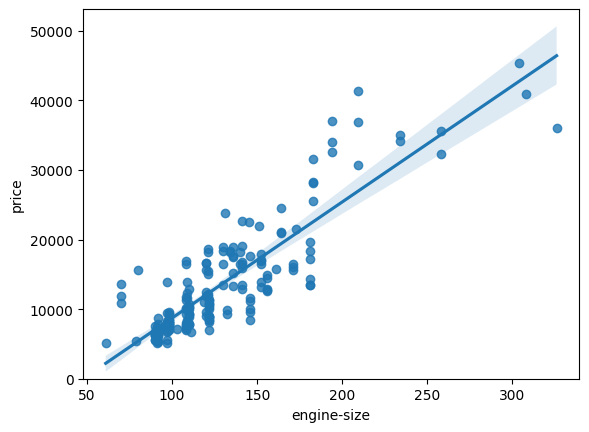

In [10]:
sns.regplot(data = df, x= 'engine-size', y='price')
plt.ylim(0,)

As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.

We can examine the correlation between 'engine-size' and 'price' and see that it's approximately 0.87 which confirms that their correlation is high.

In [11]:
df[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


## 3. Highway mpg is a potential predictor variable of price. Let's find the scatterplot of "highway-mpg" and "price".

(0.0, 48167.63332691884)

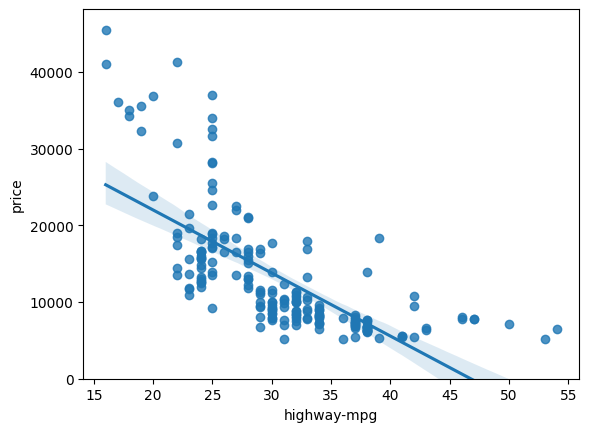

In [13]:
sns.regplot(data= df, x='highway-mpg', y='price')
plt.ylim(0,)

As highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price.

We can examine the correlation between 'highway-mpg' and 'price' and see it's approximately -0.704.

In [16]:
df[['highway-mpg','price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


## 4. Let's see if "peak-rpm" is a predictor variable of "price".



(0.0, 47414.1)

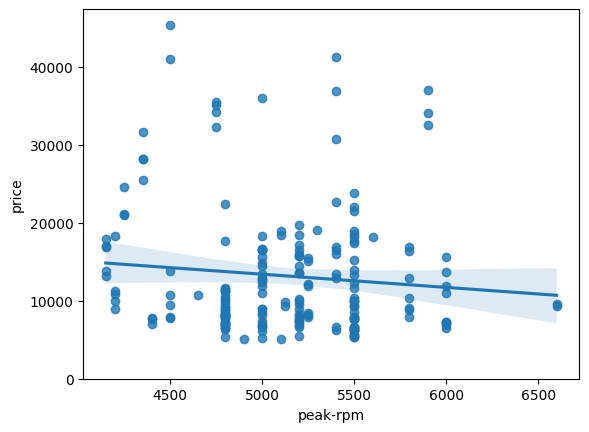

In [17]:
sns.regplot(data=df, x='peak-rpm', y='price')
plt.ylim(0,)

Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore, it's not a reliable variable.

This feature might not be suitable for predicting the price. Let's confirm it by examining the correlation.

In [18]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


The correlation is almost 0, telling that there is not a relevant correlation between peak-rpm and price.

## 5. Find the correlation between x="stroke" and y="price".

In [19]:
df[['stroke', 'price']].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


There is a weak correlation between the variable 'stroke' and 'price.' as such regression will not work well. We can see this using "regplot" to demonstrate this.

<Axes: xlabel='price', ylabel='stroke'>

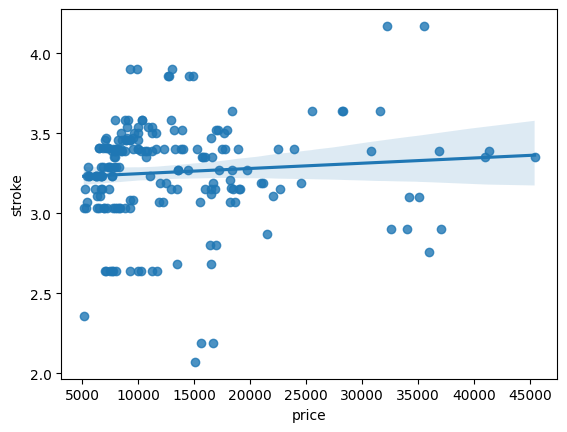

In [21]:
sns.regplot(data=df, x='price', y='stroke')

## 6. Look at the relationship between "body-style" and "price".

Since they are categorical variables, we can use boxplot.

<Axes: xlabel='body-style', ylabel='price'>

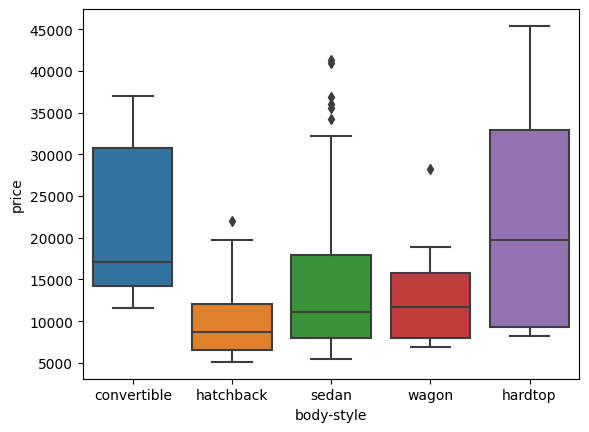

In [23]:
sns.boxplot(data=df, x= 'body-style', y ='price')

We see that the distributions of price between the different body-style categories have a significant overlap, so body-style would not be a good predictor of price.

Let's examine engine "engine-location" and "price":

<Axes: xlabel='engine-location', ylabel='price'>

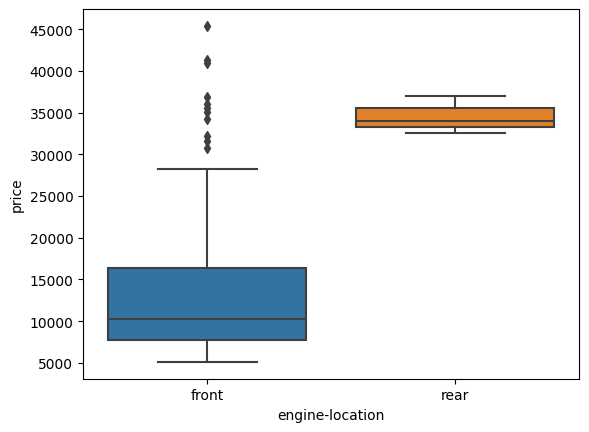

In [24]:
sns.boxplot(data = df, x='engine-location', y='price')

Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

Let's examine "drive-wheels" and "price".

<Axes: xlabel='drive-wheels', ylabel='price'>

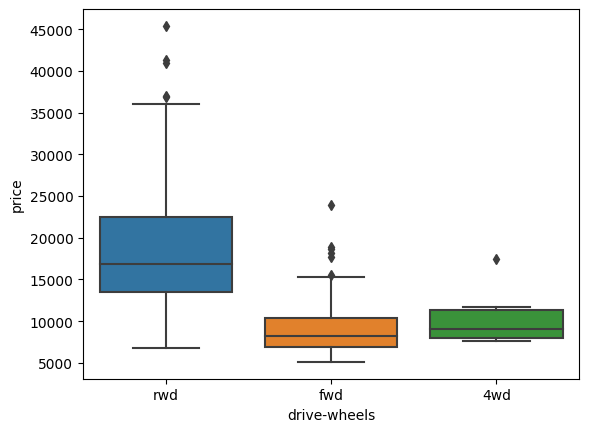

In [25]:
sns.boxplot(data=df, x='drive-wheels', y= 'price')

Here we see that the distribution of price between the different drive-wheels categories differs. As such, drive-wheels could potentially be a predictor of price.

## Analyzing the variables from a statistical method


## 7. Look at the variables by utilizing a description method.
Compute basic statistics for all continuous variables.

In [26]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


## 8. Understand how many units of each characteristic/variable we have for 'drive-wheels'

In [27]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

Let's change it to a data frame

In [28]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [29]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()

In [31]:
drive_wheels_counts.rename(columns={'drive-wheels':'value_counts'}, inplace= True)

In [32]:
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


In [33]:
drive_wheels_counts.index.name = 'drive-wheels'

In [34]:
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


## 9. Understand how many units of each characteristic/variable we have for 'engine-location'

In [41]:
engine_location = df['engine-location'].value_counts().to_frame()
engine_location.rename(columns={'engine-location':'value_counts'}, inplace = True)
engine_location.index.name='engine_location'
engine_location

,value_counts
engine_location,
front,198
rear,3


After examining the value counts of the engine location, we see that engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, so this result is skewed. Thus, we are not able to draw any conclusions about the engine location.

## 10. See that there are 3 different categories of drive wheels.

In [43]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

## 11.Which type of drive wheel is most valuable?

In [52]:
df.groupby(df['drive-wheels']).agg({'price':'mean'}).sort_values(by='price', ascending=False)

,price
drive-wheels,
rwd,19757.613333
4wd,10241.000000
fwd,9244.779661


From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.

## 12.Group by both 'drive-wheels' and 'body-style'. Include price in the analysis.

In [54]:
wheels_body_price = df[['drive-wheels','body-style','price']]

In [57]:
group_wh_bo_pr = wheels_body_price.groupby(['drive-wheels','body-style'],as_index=False).agg({'price':'mean'})

In [58]:
group_wh_bo_pr

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [60]:
group_wh_bo_pr_1 = group_wh_bo_pr.pivot(index='drive-wheels', columns='body-style')

In [61]:
group_wh_bo_pr_1

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [62]:
group_wh_bo_pr_1 = group_wh_bo_pr_1.fillna(0)

In [63]:
group_wh_bo_pr_1

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

## 13. Use the "groupby" function to find the average "price" of each car based on "body-style".

In [65]:
body_price = df.groupby('body-style', as_index =False).agg({'price':'mean'})
body_price

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


## 14. Use a heat map to visualize the relationship between Body Style vs Price.

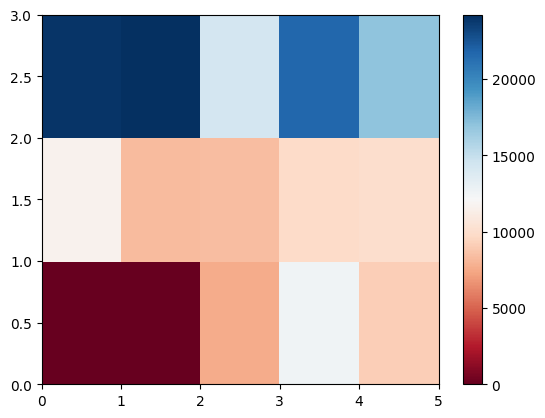

In [67]:
plt.pcolor(group_wh_bo_pr_1, cmap= 'RdBu')
plt.colorbar()
plt.show()

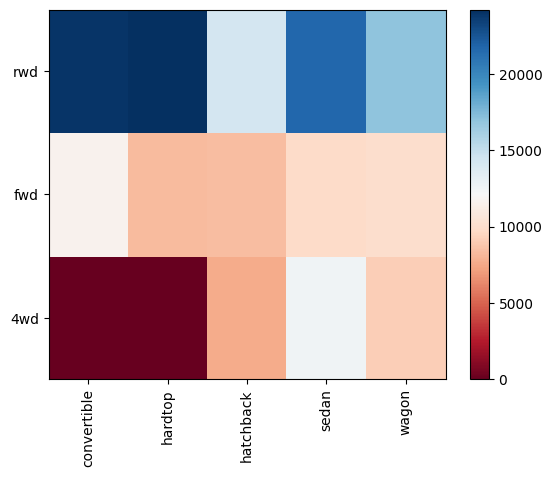

In [68]:
fig, ax = plt.subplots()
im = ax.pcolor(group_wh_bo_pr_1, cmap='RdBu')

#label names
row_labels = group_wh_bo_pr_1.columns.levels[1]
col_labels = group_wh_bo_pr_1.index

#move ticks and labels to the center
ax.set_xticks(np.arange(group_wh_bo_pr_1.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(group_wh_bo_pr_1.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

## Correlation

## How significant are the correlations?

For reference:

The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the p-value is < 0.001: we say there is strong evidence that the correlation is significant.

the p-value is < 0.05: there is moderate evidence that the correlation is significant.

the p-value is < 0.1: there is weak evidence that the correlation is significant.

the p-value is > 0.1: there is no evidence that the correlation is significant.



## 15. Calculate the Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'.

In [70]:
from scipy import stats

In [72]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270732885e-20


Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship is not extremely strong (~0.585).

## 16. Calculate the Pearson Correlation Coefficient and P-value of 'horsepower' and 'price'.

In [73]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.6906283804483638  with a P-value of P =  8.016477466159723e-30


Since the p-value is < 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).

## 17. Calculate the Pearson Correlation Coefficient and P-value of 'width' and 'price'.

In [74]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value )

The Pearson Correlation Coefficient is 0.7512653440522673  with a P-value of P = 9.20033551048206e-38


Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).

## 18. Calculate the Pearson Correlation Coefficient and P-value of 'curb-weight' and 'price'

In [75]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.8344145257702843  with a P-value of P =  2.189577238893965e-53


Since the p-value is < 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).

##19. Calculate the Pearson Correlation Coefficient and P-value of 'engine-size' and 'price':

In [76]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198793e-64


Since the p-value is < 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).

## 20. Calculate the Pearson Correlation Coefficient and P-value of 'bore' and 'price'.

In [77]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value )

The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P =   8.049189483935315e-17


Since the p-value is < 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).

## 21. Calculate the Pearson Correlation Coefficient and P-value of 'city-mpg' and 'highway-mpg'

In [78]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is -0.6865710067844678  with a P-value of P =  2.3211320655675098e-29


Since the p-value is < 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of about -0.687 shows that the relationship is negative and moderately strong.


## 22. Calculate the Pearson Correlation Coefficient and P-value of 'Highway-mpg' and 'Price'

In [80]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value )

The Pearson Correlation Coefficient is -0.704692265058953  with a P-value of P =  1.749547114447557e-31


Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of about -0.705 shows that the relationship is negative and moderately strong.

## Conclusion

The main variables for creating a model are:

Continuous numerical variables:
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Categorical variables:
<ul>
    <li>Drive-wheels</li>

These variables will give value to the model, allowing to obtain meaningful predictions.